# Analysis of Conflict Around The Continent

The Armed Conflict Location & Event Data Project aims to tracked armed conflict around the world by recording the groups attacking, where they occured and any other details about the conflict.


Purpose : To identify patterns in the way the militant groups attacked  and therefore give recommendations on what to expect and be better prepared incase they attack

Which are the top 5 most violent military groups in terms of fatalities and frequency of attacks.
How has thier activities varied in over the years
Where are thier activities concentrated?
What time did these attacks occur
Which months

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("ACLED Africa 1997-2022.csv")
data

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9713929,180,DRC27764,27764,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,...,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085,COD
1,9713930,180,DRC27765,27765,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,...,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085,COD
2,9713931,180,DRC27766,27766,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,...,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085,COD
3,9713933,180,DRC27768,27768,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,...,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085,COD
4,9714388,231,ETH9524,9524,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,...,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087,ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,694,SIE2,2,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),...,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851,SLE
305475,9695771,694,SIE3,3,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,...,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851,SLE
305476,9695772,694,SIE6,6,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),...,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851,SLE
305477,9695773,694,SIE7,7,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,...,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851,SLE


In [3]:
df = data.copy()

### Assesing the data

In [4]:
#Get dimensions
print(f"Dimensions : {data.shape}")
for col in df.columns:
    print(f" Column : {col :35} | type :{ str(df[col].dtype) } | Missing Values : {df[col].isna().sum():3} ")

Dimensions : (305479, 31)
 Column : data_id                             | type :int64 | Missing Values :   0 
 Column : iso                                 | type :int64 | Missing Values :   0 
 Column : event_id_cnty                       | type :object | Missing Values :   0 
 Column : event_id_no_cnty                    | type :int64 | Missing Values :   0 
 Column : event_date                          | type :object | Missing Values :   0 
 Column : year                                | type :int64 | Missing Values :   0 
 Column : time_precision                      | type :int64 | Missing Values :   0 
 Column : event_type                          | type :object | Missing Values :   0 
 Column : sub_event_type                      | type :object | Missing Values :   0 
 Column : actor1                              | type :object | Missing Values :   0 
 Column : assoc_actor_1                       | type :object | Missing Values : 225654 
 Column : inter1                         

**Observations**
Only 6 columns out of 31 has null values.We cant delete these because we will loose a significant amount of data.
Also they indicate that such data wasnt available or  there wasnt any extra party, which is also a valuable insight so we keep them

-Issues to solve
-Drop irrelevant columns
-Format the timestamp column
-Make the inter1 more descriptive by mapping appropriate values



In [5]:
#Drop irrelevant columns
df.drop(columns=["event_id_cnty","event_id_no_cnty","iso","iso3"],inplace=True)
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,2,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,8,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,4,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,2,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,1,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,1,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,3,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,1,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,3,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851


In [6]:
## Mapping inter1 and inter2
inter_encodings = {0:"One-Sided",1 :"State Forces",2: "Rebel Groups", 3:"Political Militias", 4:"Identity Militias",5:"Rioters",6:"Protesters",7:"Civilians",8:"External/Other Forces"}
df["inter1"] = df["inter1"].apply(lambda x: inter_encodings[x])
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,External/Other Forces,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,Identity Militias,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,State Forces,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851


In [7]:
df["inter2"] = df["inter2"].apply(lambda x: inter_encodings[x])

In [8]:
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,External/Other Forces,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,Identity Militias,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,State Forces,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851


In [9]:
#! Warning dont convert the timestamps, its giving the wrong dates
#Convert timestamp column to appropriate dtype
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,2023-01-09 19:04:45
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,External/Other Forces,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,2023-01-09 19:04:45
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,Identity Militias,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,2023-01-09 19:04:45
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,2023-01-09 19:04:45
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,State Forces,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,2023-01-09 19:04:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,2022-12-06 00:34:11
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,2022-12-06 00:34:11
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,2022-12-06 00:34:11
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,2022-12-06 00:34:11


In [ ]:
#Convert the event date column into a datetime format
df["event_date"] = pd.to_datetime(df["event_date"])
print(df["event_date"].dtype)

# Univariate Analysis

### Which year had the most  fights

In [18]:
df["event_type"].unique()

array(['Battles', 'Strategic developments', 'Violence against civilians',
       'Riots', 'Protests', 'Explosions/Remote violence'], dtype=object)

In [19]:
ct = pd.crosstab(df["event_type"],df["region"])
ct

region,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa
event_type,,,,,
Battles,33911,17531,11703,387,15112
Explosions/Remote violence,9722,958,8024,104,3926
Protests,10608,4629,31764,11904,13259
Riots,7836,3249,5929,8823,7411
Strategic developments,6349,5314,2910,637,7517
Violence against civilians,26168,15507,9376,6076,18835


<Figure size 1296x1080 with 0 Axes>

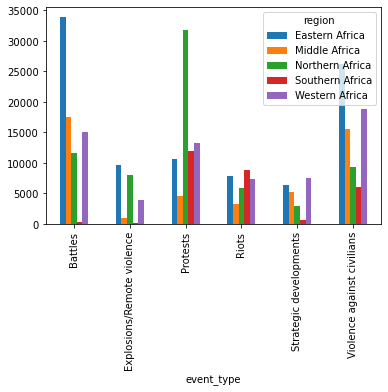

In [20]:
plt.figure(figsize=(18,15))
ct.plot(kind="bar");

<AxesSubplot:xlabel='region', ylabel='event_type'>

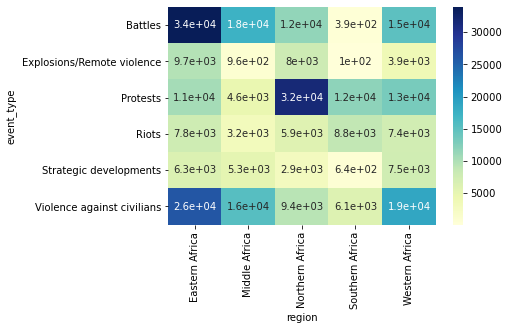

In [21]:
sb.heatmap(ct, annot=True, cmap='YlGnBu')

## Seasonal Patterns Of Conflicts

1. Are there any seasonal trends or patterns in the overall frequency of conflict events over time?
2. Are there any differences in the seasonal patterns of conflict events between different regions or countries?
3. Are there any differences in the types of conflict events that occur during different seasons ?
4.

#### Are there any seasonal trends or patterns in the overall frequency of conflict events over time?

Comparing the amount of each type of conflicts per season

In [45]:
#Find the total number of each type of conflict in each region
region_conficts = pd.crosstab(df["region"],df["event_type"])
region_conficts

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
region,,,,,,
Eastern Africa,33911,9722,10608,7836,6349,26168
Middle Africa,17531,958,4629,3249,5314,15507
Northern Africa,11703,8024,31764,5929,2910,9376
Southern Africa,387,104,11904,8823,637,6076
Western Africa,15112,3926,13259,7411,7517,18835


In [36]:
rc= df[["event_type","season","region"]]
rc

,event_type,season,region
0,Battles,summer,Middle Africa
1,Strategic developments,summer,Middle Africa
2,Violence against civilians,summer,Middle Africa
3,Battles,summer,Middle Africa
4,Violence against civilians,summer,Eastern Africa
...,...,...,...
305474,Battles,summer,Western Africa
305475,Battles,summer,Western Africa
305476,Violence against civilians,summer,Western Africa
305477,Battles,summer,Western Africa


In [37]:
cr = pd.crosstab(rc["event_type"],rc["season"])
cr

season,autumn,spring,summer,winter
event_type,,,,
Battles,19812,19200,19535,20097
Explosions/Remote violence,6085,5422,5501,5726
Protests,17983,19110,18618,16453
Riots,8662,8076,8337,8173
Strategic developments,5271,5915,5917,5624
Violence against civilians,19600,18270,19105,18987


<Figure size 1008x576 with 0 Axes>

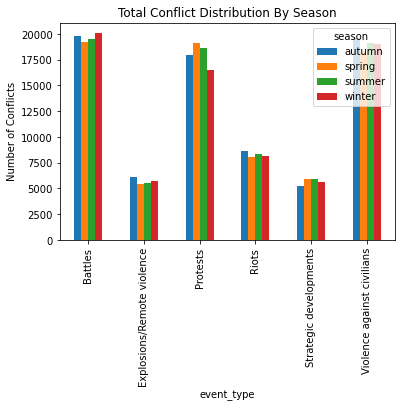

In [49]:
plt.figure(figsize=(14,8))
cr.plot(kind="bar")
plt.ylabel("Number of Conflicts")
plt.title("Total Conflict Distribution By Season");

**Observations**
The most common types of conflicts are Battles,Protests and Violence against civilians, battles being the most common among all types of conflicts
There isnt much variation among each type of confict in a single season.However protests do show quite a big drop in variation in winter.There are signficantly less protests in winter

**Observations**
The average number of conflicts per year is 11 749 and the median is 4983